In [39]:
import numpy as np
np.linalg.inv(np.array([[1, 0.5],[0.5, 1]]))

array([[ 1.33333333, -0.66666667],
       [-0.66666667,  1.33333333]])

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Maximum Likelihood Estimation (MLE)

data(observation)이 주어졌을때 model의 parameter를 찾는 방법
$\rightarrow$ observation의 likelihood를 maximize하는 parameter를 찾는다

모든 data들은 $p(\mathbf{x}|\boldsymbol{\theta})$의 pdf를 가지는 모집단으로부터 추출한 iid (independent and identically distributed) sample이고 이들의 likelihood function은 다음과 같다

### likelihood function : $L(\boldsymbol{\theta}|D)=L(\theta_1,\dots,\theta_k|\mathbf{x}_1,\dots,\mathbf{x}_n)=p(D|\boldsymbol{\theta})=\Pi^n_{i=1} p(\mathbf{x}_i|\boldsymbol{\theta})$

where $D=\{\mathbf{x}_1,\dots \mathbf{x}_n\}$, $\boldsymbol{\theta}$ is the parameters to be estimated.

### 따라서 MLE는 $p(D|\boldsymbol{\theta})$를 maximize하는 $\hat{\boldsymbol{\theta}}$를 찾는 것

### $\rightarrow  \hat{\boldsymbol{\theta}}=\arg\max_\boldsymbol{\theta} p(D|\boldsymbol{\theta})$ 

$L(\boldsymbol{\theta})$를 maximizing하는 것은 $\ln L(\boldsymbol{\theta})$를 maximizing하는 것과 동일

또는,  $\ln L(\boldsymbol{\theta})$를 maximizing하는 것은  negative log-likelihood(NLL) = $-\ln L(\boldsymbol{\theta})$를 minimizing하는 것과 동일

### $l(\boldsymbol{\theta}) =\sum^n_{k=1} \ln p(\mathbf{x}_k|\boldsymbol{\theta})$
### $\nabla_\theta l(\boldsymbol{\theta}) =\sum^n_{k=1}\nabla_\theta \ln p(\mathbf{x}_k|\boldsymbol{\theta})=0$

### $\rightarrow$ 위 식을 만족하는 $\hat{\boldsymbol{\theta}}$를 찾는다

### [Exercise 1] - methods for estimating parameters

Maximum likelihood estimation(MLE)를 이용하여 linear model로 fitting하는 연습을 해본다.

In [41]:
# Choose the "true" parameters.
a0_true = 4.294
a1_true = -0.9594

sigma = 3

# Generate some synthetic data from the model.
N = 50
x = (10*np.random.rand(N))
yerr = 0+ sigma*np.random.randn(N)
y = a1_true*x + a0_true
y +=yerr


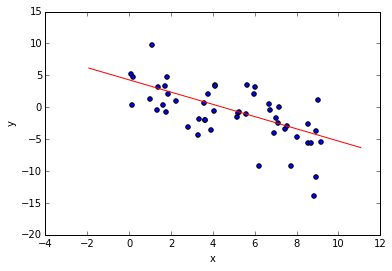

In [18]:
xx = np.arange(min(x)-2,max(x)+2)
yy = a1_true *xx + a0_true

plt.scatter(x, y)
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

실제 model은 빨간선으로 나타나있고, model로 부터 얻은 sample들은 파란점으로 나타나있다. 실제 우리가 얻는 데이터는 error $\epsilon$를 가질 수 있다.

$\mathbf{y}=\mathbf{X}\mathbf{a} + \epsilon$

$N(\epsilon_i; 0,\sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} \exp (-\frac{(y_i-\mathbf{a}^T\mathbf{x_i})^2}{2\sigma^2})=\frac{1}{\sqrt{2\pi}\sigma} \exp (-\frac{(\mathbf{y}-\mathbf{X}\mathbf{a})^2}{2\sigma^2})$

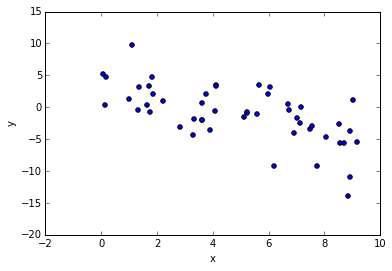

In [19]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

우리가 실제 model을 모른다고 가정했을때, sample들만 가지고 실제 model을 예측해보려 한다.

### --- Maximum Likelihood Estimator ($\mathbf{a}$) --- Linear Least Square Estimator

가장 쉬운 방법은 linear least square 를 이용하는 것이다. $\rightarrow$  $y=a_1x+a_0 $ line의 coefficient $a_0,a_1$을 찾는 것

NLL$(\boldsymbol{\theta})= -\sum_{i=1}^N \ln p(y_i|\mathbf{x}_i,\boldsymbol{\theta})$ =  $-\sum_{i=1}^N \ln [(\frac{1}{\sqrt{2\pi}\sigma}) \exp (-{\frac{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}{2\sigma^2}})]$ = $-\sum_{i=1}^N \ln (\frac{1}{\sqrt{2\pi}\sigma}) - ({\frac{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}{2\sigma^2}})$

= $\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}\sum_{i=1}^N {{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}}$ = $\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}R(\mathbf{a})$

$R(\mathbf{a}) = \sum \|y_i - \hat{y_i}\|^2 = \sum \|y_i - (a_1x_i+a_0))\|^2$

### $\mathbf{y}= \mathbf{X}\mathbf{a} \rightarrow \hat{\mathbf{a}}=\arg\min_\mathbf{a} \|\mathbf{y}-\mathbf{X}\mathbf{a}\|^2 $

$R(\mathbf{a}) = (\mathbf{y}-\mathbf{X}\mathbf{a})^T (\mathbf{y}-\mathbf{X}\mathbf{a})$ 
$=(\mathbf{y}^T-\mathbf{a}^T\mathbf{X}^T) (\mathbf{y}-\mathbf{X}\mathbf{a})$
$=\mathbf{y}^T\mathbf{y}-2\mathbf{y}^T\mathbf{X}\mathbf{a}  + \mathbf{y}^T\mathbf{X}^T\mathbf{X}\mathbf{y}$

$\frac{\partial R(\mathbf{a})}{\partial \mathbf{a}}=\frac{\partial}{\partial \mathbf{a}}=\mathbf{y}^T\mathbf{y}-2\mathbf{y}^T\mathbf{X}\mathbf{a}  + \mathbf{y}^T\mathbf{X}^T\mathbf{X}\mathbf{y}$ 
$=-2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{a}=0$

### 따라서 linear least square loss를 이용하여 찾은 parameter $\mathbf{a}$는 
###  $ \mathbf{a} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}$ 

In [20]:
X = np.vstack((np.ones_like(x),x)).T

# 위의 식을 한번 작성해보세요
#a = 
a = np.dot(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)


a0_est_ls = a[0]
a1_est_ls = a[1]
print(a1_est_ls, a0_est_ls)

(-0.99260333852157978, 3.8088445874971208)


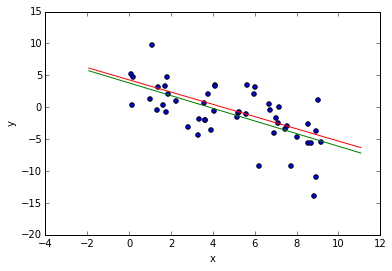

In [21]:
xxls = np.arange(min(x)-2,max(x)+2)
yyls = a1_est_ls *xxls + a0_est_ls

plt.scatter(x, y)
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### --- Maximum Likelihood Estimator ($\sigma$)

NLL$(\boldsymbol{\theta})=-\frac{N}{2}\ln (\frac{1}{2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}\sum_{i=1}^N {{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}}$ =  $\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}R(\mathbf{a})$

$\frac{\partial}{\partial\sigma^2}$NLL$(\boldsymbol{\theta})= \frac{\partial}{\partial\sigma^2}(\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}R(\mathbf{a})) =\frac{N}{2\sigma^2} -\frac{1}{{2\sigma^4}}R(\mathbf{a}) =0$

 $\hat{\sigma}^2=\frac{1}{N}(\mathbf{y}-\mathbf{X}\mathbf{a})^T (\mathbf{y}-\mathbf{X}\mathbf{a})$ = $\frac{N-2}{N}$MSE

## Maximum likelihood estimation using gradient-based optimization

In [57]:
#   define a function to calculate the negative log likelihood
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = (np.matmul(error.T,error))/n
    
    nlogf = n*0.5 * np.log(2.0*np.math.pi*sigma*sigma) + ((np.dot(error,error))/(2*sigma*sigma))

    return nlogf

In [58]:
#   define my function which will return the objective function to be minimized
def myFunction(var,X,y):
    yGuess = np.matmul(X,var)
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (f)

Optimization terminated successfully.
         Current function value: 158.305757
         Iterations: 5
         Function evaluations: 48
         Gradient evaluations: 12
(2.6022349612524152, -0.72425122211493831)


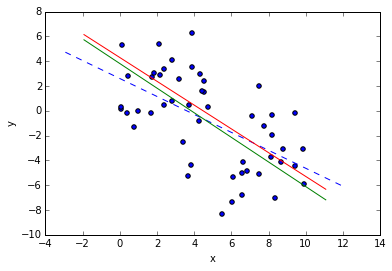

In [59]:
nvar = 2
var = np.zeros(nvar)
var[0] = 4.5
var[1] = -1.8

X = np.vstack((np.ones_like(x),x)).T

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, args=(X,y), method='BFGS', options={'disp': True})
a0_est_mle, a1_est_mle = res["x"]
print(a0_est_mle ,a1_est_mle)

xxmle = np.arange(min(x)-3,max(x)+3)
yymle = a1_est_mle *xxmle + a0_est_mle

plt.scatter(x, y)
plt.plot(xxmle,yymle,'b--')
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### [Exercise 2] - methods for estimating parameters

$a_2x^2 + a_1x +a_0=y$

In [7]:
# Choose the "true" parameters.
a2_true = 1.243
a1_true = -0.9594
a0_true = 4.294


sigma = 10

# Generate some synthetic data from the model.
N = 100
x = 10*np.random.rand(N)
yerr = 0+ sigma*np.random.randn(N)
y = a2_true*x**2 + a1_true*x + a0_true
y +=yerr


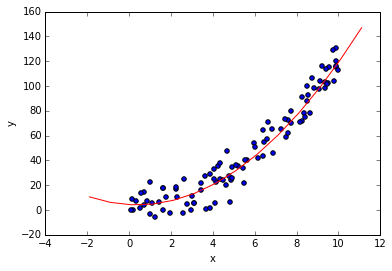

In [8]:
xx = np.arange(min(x)-2,max(x)+2)
yy = a2_true*xx**2 + a1_true*xx + a0_true

plt.scatter(x, y)
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### 1) least square estimation 방법 이용

In [9]:
X = np.vstack((np.ones_like(x),x,x**2)).T

# 위의 식을 한번 작성해보세요
#a = 
a = np.dot(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)


a0_est_ls = a[0]
a1_est_ls = a[1]
a2_est_ls = a[2]
print(a2_est_ls, a1_est_ls, a0_est_ls)

(1.3038316897293725, -1.4730210967892807, 6.0903588905279289)


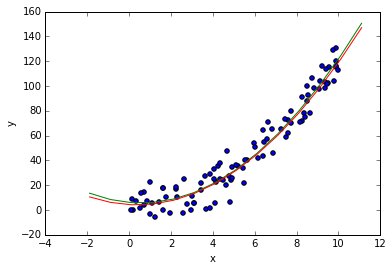

In [10]:
xxls = np.arange(min(x)-2,max(x)+2)
yyls = a2_est_ls * xxls**2 + a1_est_ls *xxls + a0_est_ls

plt.scatter(x, y)
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### 2) MLE (gradient descent) 방법 이용

In [45]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = (np.matmul(error.T,error))/n
        
    logf = n * 0.5 * np.log(2.0*np.math.pi*sigma*sigma) + ((np.dot(error,error))/(2*sigma*sigma))

    return logf

In [46]:
#   define my function which will return the objective function to be minimized
def myFunction(var,x,y):
    yGuess = (var[2]*x**2) + (var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (1*f)

Optimization terminated successfully.
         Current function value: 158.304559
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 20
(2.5727154108538675, -0.70543132566032141, -0.001926174513929897)


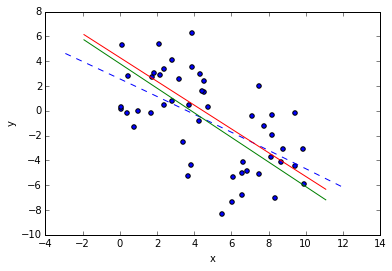

In [47]:
nvar = 3
var = np.zeros(nvar)
var[0] = 1.5
var[1] = -1.8
var[2] = 0.2

X = np.vstack((np.ones_like(x),x, x**2)).T

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, args=(x,y), method='BFGS', options={'disp': True})
a0_est_mle, a1_est_mle, a2_est_mle= res["x"]
print(a0_est_mle ,a1_est_mle, a2_est_mle)

xxmle = np.arange(min(x)-3,max(x)+3)
yymle = a2_est_mle*xxmle**2 + a1_est_mle *xxmle + a0_est_mle

plt.scatter(x, y)
plt.plot(xxmle,yymle,'b--')
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### Additional problem(or homework)

위에 식에 Sigma도 집어넣어서 estimation 할 수 있을까?

Optimization terminated successfully.
         Current function value: 167.271710
         Iterations: 21
         Function evaluations: 180
         Gradient evaluations: 30
      fun: 167.27170957851604
 hess_inv: array([[  1.04116973e+00,  -4.40118755e-01,   3.86697097e-02,
         -1.75925342e-02],
       [ -4.40118755e-01,   2.46340930e-01,  -2.42330147e-02,
          9.49712864e-03],
       [  3.86697097e-02,  -2.42330147e-02,   2.52671175e-03,
         -9.88134387e-04],
       [ -1.75925342e-02,   9.49712864e-03,  -9.88134387e-04,
          4.79669227e-01]])
      jac: array([  0.00000000e+00,   0.00000000e+00,   7.62939453e-06,
         0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 180
      nit: 21
     njev: 30
   status: 0
  success: True
        x: array([  3.04136172,  -0.50787969,  -0.05070768,  10.80739966])
(3.0413617160285096, -0.50787969020794832, -0.050707676380150092)


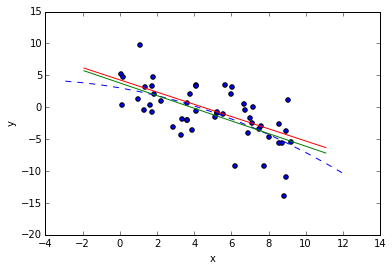

In [36]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(guess, true, n, sGuess):
    error = true-guess
    sigma = (np.matmul(error.T,error))/n
    
    logf = n * 0.5 * np.log(2.0*np.math.pi*sigma*sigma) + ((np.dot(error.T,error))/(2*sigma*sigma)) + 1*(sGuess-sigma)*(sGuess-sigma)

    return logf

#   define my function which will return the objective function to be minimized
def myFunction(var,x,y):
    yGuess = (var[2]*x**2) + (var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)), var[3])
    return (1*f)

nvar = 3+1
var = np.zeros(nvar)
var[0] = 1.5
var[1] = -1.8
var[2] = 0.2
var[3] = 1

X = np.vstack((np.ones_like(x),x, x**2)).T

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, args=(x,y), method='BFGS', options={'disp': True})
print(res)
a0_est_mle, a1_est_mle, a2_est_mle, sigma_est_mle = res["x"]
print(a0_est_mle ,a1_est_mle, a2_est_mle)

xxmle = np.arange(min(x)-3,max(x)+3)
yymle = a2_est_mle*xxmle**2 + a1_est_mle *xxmle + a0_est_mle

plt.scatter(x, y)
plt.plot(xxmle,yymle,'b--')
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')